## <div align="center"> TUGAS LAB IS794 DEEP LEARNING </div>
### <div align="center"> WEEK [06] : [Fundamentals of Machine Learning] </div>

#### <div align="center"> Semester Ganjil 2023/2024 </div>

In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

In [3]:
training_df = pd.read_csv("wines_SPA.csv")

training_df

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013.0,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018.0,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009.0,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999.0,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996.0,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016.0,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018.0,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017.0,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011.0,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


In [5]:
def encode_data(feature_name):
    mapping_dict = {}
    unique_values = list(training_df[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    return mapping_dict

y = training_df["rating"]
X = training_df.drop("rating", axis=1)

X = training_df.drop(["country", "winery", "wine", "price", "num_reviews"], axis=1)

X["region"].replace(encode_data("region"), inplace = True)
X["type"].replace(encode_data("type"), inplace = True)

X["body"].replace("NA", "1", inplace = True)
X["acidity"].replace("NA", "1", inplace = True)
X = X.fillna(2010)

In [6]:
X

,year,rating,region,type,body,acidity
0,2013.0,4.9,0,0,5.0,3.0
1,2018.0,4.9,1,1,4.0,2.0
2,2009.0,4.8,2,2,5.0,3.0
3,1999.0,4.8,2,2,5.0,3.0
4,1996.0,4.8,2,2,5.0,3.0
...,...,...,...,...,...,...
7495,2016.0,4.2,7,7,4.0,3.0
7496,2018.0,4.2,6,6,4.0,3.0
7497,2017.0,4.2,49,4,4.0,3.0
7498,2011.0,4.2,2,2,5.0,3.0


In [9]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [10]:
from keras.utils import to_categorical

y = to_categorical(y, num_classes=8)

In [11]:
X = np.asarray(X).astype("float32")
y = np.asarray(y).astype("float32")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Epoch 1/50
132/132 - 2s - loss: 2.1380 - accuracy: 0.0457 - val_loss: 2.0103 - val_accuracy: 0.0600 - 2s/epoch - 12ms/step
Epoch 2/50
132/132 - 0s - loss: 1.9001 - accuracy: 0.1069 - val_loss: 1.7802 - val_accuracy: 0.1419 - 295ms/epoch - 2ms/step
Epoch 3/50
132/132 - 0s - loss: 1.6766 - accuracy: 0.2848 - val_loss: 1.5628 - val_accuracy: 0.5229 - 334ms/epoch - 3ms/step
Epoch 4/50
132/132 - 0s - loss: 1.4652 - accuracy: 0.7490 - val_loss: 1.3578 - val_accuracy: 0.9790 - 300ms/epoch - 2ms/step
Epoch 5/50
132/132 - 0s - loss: 1.2665 - accuracy: 0.9938 - val_loss: 1.1649 - val_accuracy: 0.9971 - 288ms/epoch - 2ms/step
Epoch 6/50
132/132 - 0s - loss: 1.0802 - accuracy: 1.0000 - val_loss: 0.9852 - val_accuracy: 1.0000 - 301ms/epoch - 2ms/step
Epoch 7/50
132/132 - 0s - loss: 0.9092 - accuracy: 1.0000 - val_loss: 0.8217 - val_accuracy: 1.0000 - 299ms/epoch - 2ms/step
Epoch 8/50
132/132 - 0s - loss: 0.7550 - accuracy: 1.0000 - val_loss: 0.6770 - val_accuracy: 1.0000 - 300ms/epoch - 2ms/step
Ep

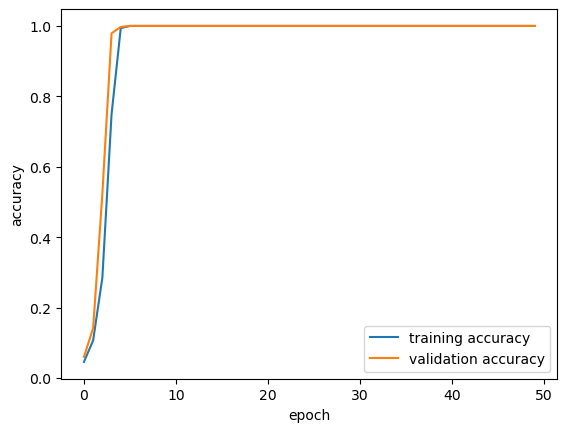

In [14]:
model = Sequential()
model.add(Dense(32, input_dim=6, activation="relu"))
model.add(Dense(8, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

plt.plot(history.history["accuracy"], label="training accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [15]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"test loss: {loss}, test accuracy: {accuracy}")

71/71 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
test loss: 0.0031284706201404333, test accuracy: 1.0


### Question 1: 
Can you see whether the model is overfitting or underfitting? how do you know?
Kita dapat melihat bahwa model overfitting/underfitting dari grafik prediction error. Apabila garis validation dibawah training makan underfit, model belum mampu memprediksi data dan sebaliknya.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

Epoch 1/20
99/99 - 1s - loss: 2.4403 - accuracy: 6.3492e-04 - val_loss: 2.3298 - val_accuracy: 0.0052 - 1s/epoch - 11ms/step
Epoch 2/20
99/99 - 0s - loss: 2.2395 - accuracy: 0.0537 - val_loss: 2.1384 - val_accuracy: 0.0933 - 294ms/epoch - 3ms/step
Epoch 3/20
99/99 - 0s - loss: 2.0514 - accuracy: 0.1108 - val_loss: 1.9585 - val_accuracy: 0.1356 - 275ms/epoch - 3ms/step
Epoch 4/20
99/99 - 0s - loss: 1.8721 - accuracy: 0.1867 - val_loss: 1.7846 - val_accuracy: 0.2622 - 297ms/epoch - 3ms/step
Epoch 5/20
99/99 - 0s - loss: 1.7005 - accuracy: 0.3381 - val_loss: 1.6188 - val_accuracy: 0.4807 - 298ms/epoch - 3ms/step
Epoch 6/20
99/99 - 0s - loss: 1.5381 - accuracy: 0.6232 - val_loss: 1.4635 - val_accuracy: 0.7800 - 335ms/epoch - 3ms/step
Epoch 7/20
99/99 - 0s - loss: 1.3865 - accuracy: 0.8708 - val_loss: 1.3177 - val_accuracy: 0.9963 - 301ms/epoch - 3ms/step
Epoch 8/20
99/99 - 0s - loss: 1.2447 - accuracy: 0.9990 - val_loss: 1.1811 - val_accuracy: 1.0000 - 286ms/epoch - 3ms/step
Epoch 9/20
99/

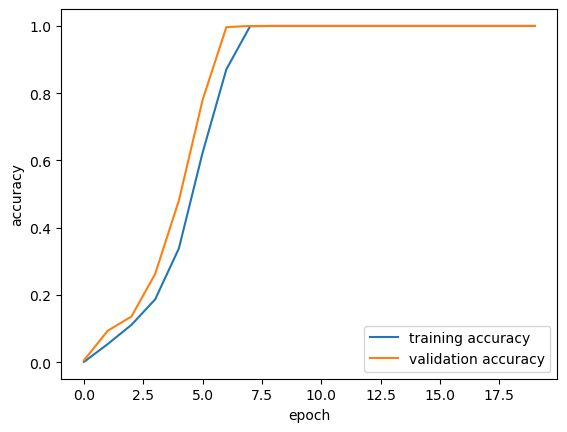

In [17]:
model = Sequential()
model.add(Dense(32, input_dim=6, activation="relu"))
model.add(Dense(8, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.3, verbose=2)

plt.plot(history.history["accuracy"], label="training accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

### Question 2: 
What are the results now, are there still indications of overfitting?

Betul, model masih terlalu overfitting, ditandai oleh nilai akurasi 100%. Artinya model bekerja terlalu sempurna untuk mempelajari data tersebut tetapi tidak pada data yang mungkin saja ditambahkan.

In [18]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"test loss: {loss}, test accuracy: {accuracy}")

94/94 [==============================] - 0s 3ms/step - loss: 0.2291 - accuracy: 1.0000
test loss: 0.22905030846595764, test accuracy: 1.0


Epoch 1/20
99/99 - 1s - loss: 2.3251 - accuracy: 0.0727 - val_loss: 2.1048 - val_accuracy: 0.0000e+00 - 1s/epoch - 10ms/step
Epoch 2/20
99/99 - 0s - loss: 2.1744 - accuracy: 0.1254 - val_loss: 1.9868 - val_accuracy: 0.0022 - 345ms/epoch - 3ms/step
Epoch 3/20
99/99 - 0s - loss: 2.0633 - accuracy: 0.1781 - val_loss: 1.8740 - val_accuracy: 0.1259 - 289ms/epoch - 3ms/step
Epoch 4/20
99/99 - 0s - loss: 1.9447 - accuracy: 0.2708 - val_loss: 1.7670 - val_accuracy: 0.3067 - 347ms/epoch - 4ms/step
Epoch 5/20
99/99 - 0s - loss: 1.8421 - accuracy: 0.3537 - val_loss: 1.6642 - val_accuracy: 0.8000 - 356ms/epoch - 4ms/step
Epoch 6/20
99/99 - 0s - loss: 1.7258 - accuracy: 0.4648 - val_loss: 1.5637 - val_accuracy: 0.9096 - 303ms/epoch - 3ms/step
Epoch 7/20
99/99 - 0s - loss: 1.6276 - accuracy: 0.5556 - val_loss: 1.4664 - val_accuracy: 0.9393 - 332ms/epoch - 3ms/step
Epoch 8/20
99/99 - 0s - loss: 1.5197 - accuracy: 0.6543 - val_loss: 1.3716 - val_accuracy: 0.9585 - 326ms/epoch - 3ms/step
Epoch 9/20
99/

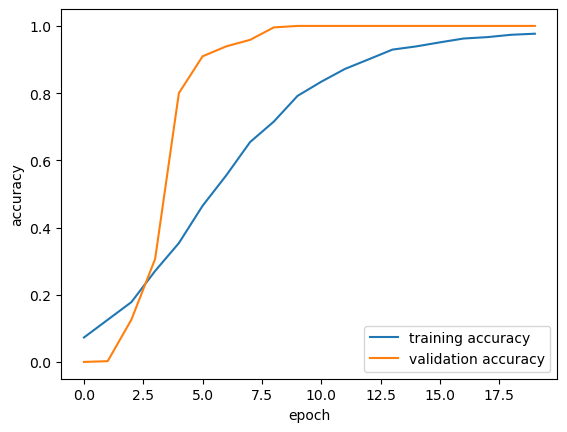

In [19]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(16, input_dim=6, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(8, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.3, verbose=2)

plt.plot(history.history["accuracy"], label="training accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [20]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"test loss: {loss}, test accuracy: {accuracy}")

94/94 [==============================] - 0s 2ms/step - loss: 0.4993 - accuracy: 1.0000
test loss: 0.49930810928344727, test accuracy: 1.0


In [22]:
from keras.regularizers import l1, l2

model_l1 = Sequential()
model_l1.add(Dense(64, input_dim=6, activation="relu", kernel_regularizer=l1(0.01)))
model_l1.add(Dense(8, activation="sigmoid"))

model_l2 = Sequential()
model_l2.add(Dense(64, input_dim=6, activation="relu", kernel_regularizer=l2(0.01)))
model_l2.add(Dense(8, activation="sigmoid"))

model_l1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_l2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_l1.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
model_l2.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
141/141 [==============================] - 1s 5ms/step - loss: 1.3866 - accuracy: 0.8927 - val_loss: 0.6364 - val_accuracy: 1.0000
Epoch 2/20
141/141 [==============================] - 0s 3ms/step - loss: 0.4638 - accuracy: 1.0000 - val_loss: 0.3372 - val_accuracy: 1.0000
Epoch 3/20
141/141 [==============================] - 0s 3ms/step - loss: 0.2571 - accuracy: 1.0000 - val_loss: 0.1920 - val_accuracy: 1.0000
Epoch 4/20
141/141 [==============================] - 1s 4ms/step - loss: 0.1489 - accuracy: 1.0000 - val_loss: 0.1116 - val_accuracy: 1.0000
Epoch 5/20
141/141 [==============================] - 1s 4ms/step - loss: 0.0810 - accuracy: 1.0000 - val_loss: 0.0534 - val_accuracy: 1.0000
Epoch 6/20
141/141 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 1.0000 - val_loss: 0.0209 - val_accuracy: 1.0000
Epoch 7/20
141/141 [==============================] - 1s 5ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

def create_model():
    model = Sequential()
    model.add(Dense(16, input_dim=6, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])
    return model

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = []

In [28]:
scores = []

for train_index, test_index in kf.split(X_test):
    X_train_fold, X_val_fold = X_test[train_index], X_test[test_index]
    y_train_fold, y_val_fold = y_test[train_index], y_test[test_index]
    
    model = create_model()
    
    model.fit(X_train_fold, y_train_fold, epochs=20, batch_size=32, verbose=2)
    
    _, accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    scores.append(accuracy)
    
print("accuracy: %.3f (%.3f)" % (np.mean(scores), np.std(scores)))

Epoch 1/20
75/75 - 1s - loss: 2.4152 - accuracy: 0.0758 - 539ms/epoch - 7ms/step
Epoch 2/20
75/75 - 0s - loss: 2.3500 - accuracy: 0.1100 - 120ms/epoch - 2ms/step
Epoch 3/20
75/75 - 0s - loss: 2.2382 - accuracy: 0.1725 - 124ms/epoch - 2ms/step
Epoch 4/20
75/75 - 0s - loss: 2.1650 - accuracy: 0.2108 - 135ms/epoch - 2ms/step
Epoch 5/20
75/75 - 0s - loss: 2.0923 - accuracy: 0.2392 - 132ms/epoch - 2ms/step
Epoch 6/20
75/75 - 0s - loss: 2.0111 - accuracy: 0.3167 - 137ms/epoch - 2ms/step
Epoch 7/20
75/75 - 0s - loss: 1.9444 - accuracy: 0.3529 - 130ms/epoch - 2ms/step
Epoch 8/20
75/75 - 0s - loss: 1.8470 - accuracy: 0.4387 - 133ms/epoch - 2ms/step
Epoch 9/20
75/75 - 0s - loss: 1.8188 - accuracy: 0.4717 - 119ms/epoch - 2ms/step
Epoch 10/20
75/75 - 0s - loss: 1.7336 - accuracy: 0.5521 - 143ms/epoch - 2ms/step
Epoch 11/20
75/75 - 0s - loss: 1.6746 - accuracy: 0.6208 - 193ms/epoch - 3ms/step
Epoch 12/20
75/75 - 0s - loss: 1.5912 - accuracy: 0.6954 - 153ms/epoch - 2ms/step
Epoch 13/20
75/75 - 0s - 

### Question 3: 
From number 8, 9, and 10, which method do you think is the most effective in improving model performance and avoiding overfitting?

Metode nomor 10 karena akurasinya berhasil dikurangi agar tidak menjadi terlalu overfitting.